# L1 Regularization (Lasso) - Complete Guide

## 🎯 What This Notebook Covers

In this comprehensive notebook, we explore **L1 Regularization** (also known as Lasso - Least Absolute Shrinkage and Selection Operator):

1. ✅ **The Overfitting Problem** - Why we need regularization
2. ✅ **Mathematical Foundation** - Complete derivations with intuition
3. ✅ **Multiple Intuitive Examples** - Feature selection, geometry, analogies
4. ✅ **Implementation from Scratch** - Pure NumPy implementation
5. ✅ **29 Comprehensive Visualizations** - Visual learning at every step
6. ✅ **L1 vs L2 Comparison** - When to use which
7. ✅ **Practical Guidelines** - Hyperparameter tuning and best practices

### Why L1 Regularization?

**Key Property: SPARSITY** 🎯

L1 regularization drives many weights to **exactly zero**, effectively performing **automatic feature selection**. This makes models:
- More interpretable (fewer features)
- Faster to compute (sparse matrices)
- Better at generalization (simpler models)

Let's dive deep into the mathematics and intuition! 🚀

---

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.0.2


## 2. The Overfitting Problem

Before diving into L1 regularization, let's understand **why** we need regularization in the first place.

### The Problem: Models That Memorize

When a model is too complex:
- ✅ **Training accuracy**: Very high (even 100%)
- ❌ **Test accuracy**: Poor (model doesn't generalize)
- 🔴 **The model memorizes** training data instead of learning patterns

This is called **OVERFITTING**.

### Visualization 1: The Overfitting Problem

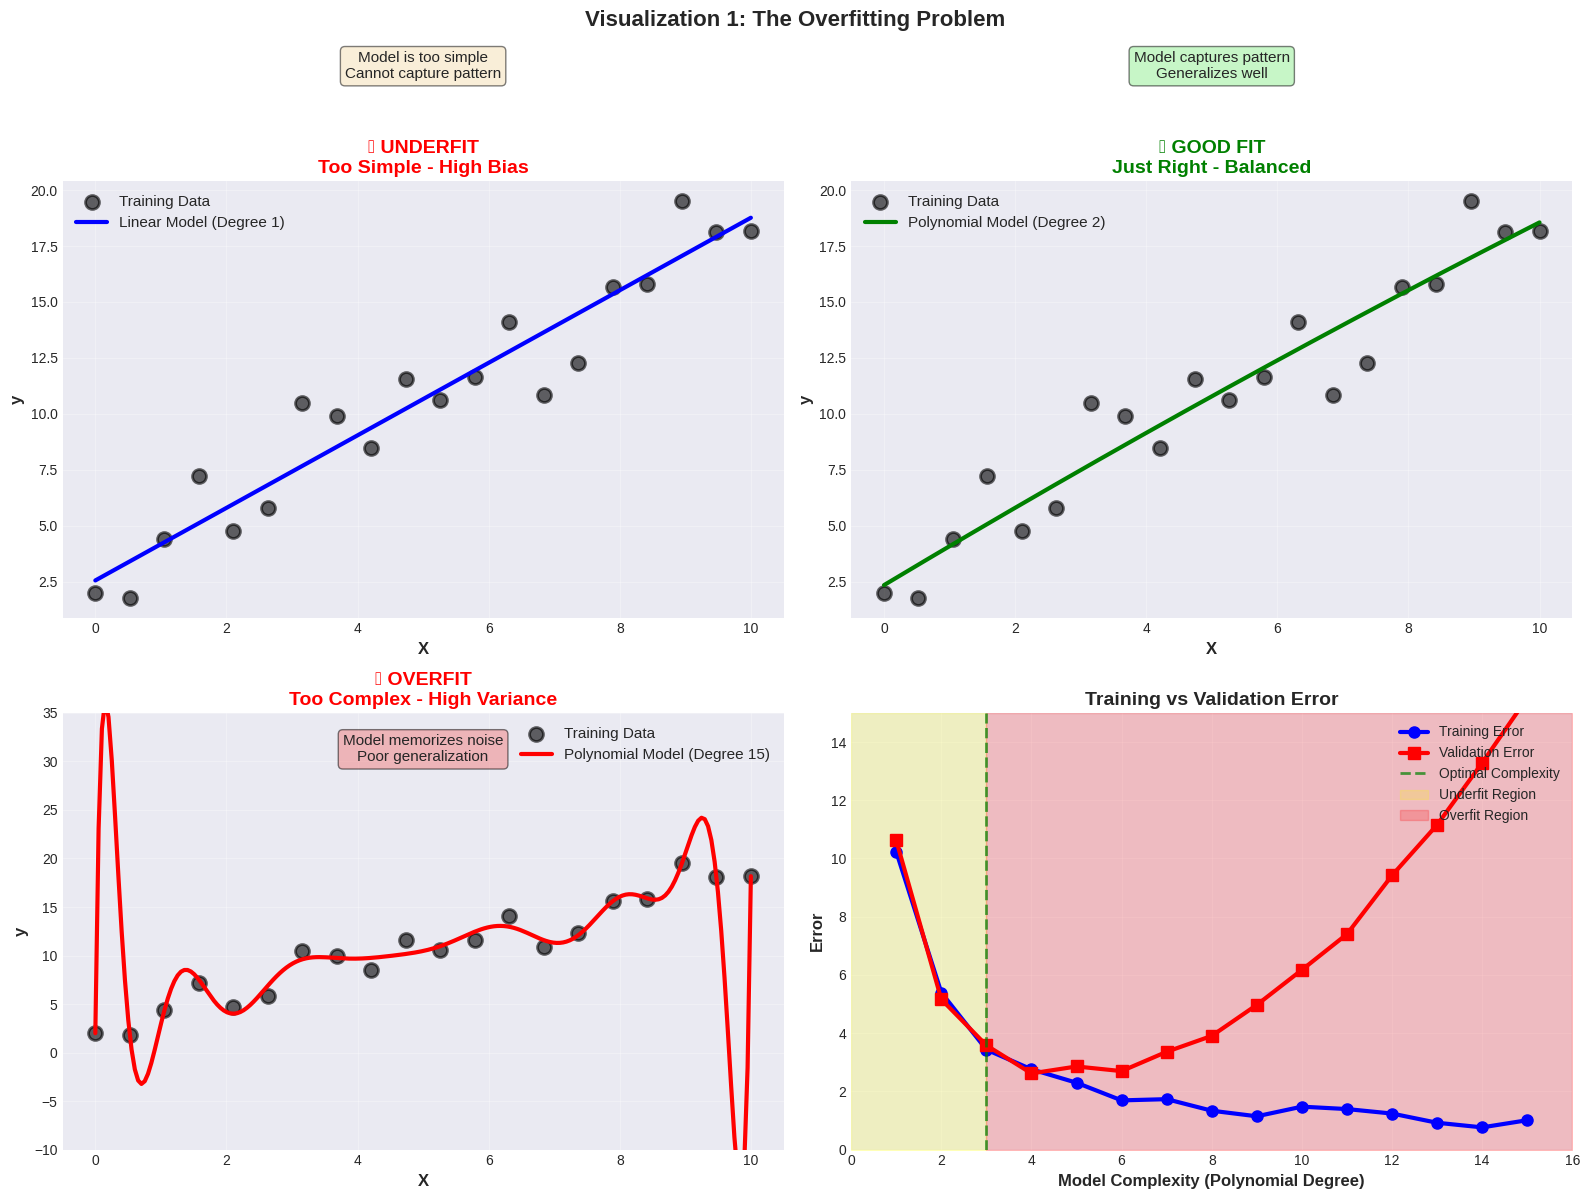


📊 Key Observations:
  • Underfit: Model too simple, high training AND test error
  • Good Fit: Balanced complexity, low training AND test error
  • Overfit: Model too complex, low training error but HIGH test error
  • Sweet Spot: Where validation error is minimized


In [2]:
# Generate synthetic data for demonstration
np.random.seed(42)
X_demo = np.linspace(0, 10, 20)
y_demo = 2 * X_demo + 1 + np.random.randn(20) * 2

# Fit polynomials of different degrees
X_plot = np.linspace(0, 10, 200)

# Underfit: degree 1
coef_underfit = np.polyfit(X_demo, y_demo, 1)
y_underfit = np.polyval(coef_underfit, X_plot)

# Good fit: degree 2
coef_goodfit = np.polyfit(X_demo, y_demo, 2)
y_goodfit = np.polyval(coef_goodfit, X_plot)

# Overfit: degree 15
coef_overfit = np.polyfit(X_demo, y_demo, 15)
y_overfit = np.polyval(coef_overfit, X_plot)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Underfit
axes[0, 0].scatter(X_demo, y_demo, c='black', s=100, alpha=0.6, edgecolors='black', linewidth=2, label='Training Data')
axes[0, 0].plot(X_plot, y_underfit, 'b-', linewidth=3, label='Linear Model (Degree 1)')
axes[0, 0].set_xlabel('X', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('y', fontsize=12, fontweight='bold')
axes[0, 0].set_title('❌ UNDERFIT\nToo Simple - High Bias', fontsize=14, fontweight='bold', color='red')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(5, 25, 'Model is too simple\nCannot capture pattern', 
                ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Good fit
axes[0, 1].scatter(X_demo, y_demo, c='black', s=100, alpha=0.6, edgecolors='black', linewidth=2, label='Training Data')
axes[0, 1].plot(X_plot, y_goodfit, 'g-', linewidth=3, label='Polynomial Model (Degree 2)')
axes[0, 1].set_xlabel('X', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('y', fontsize=12, fontweight='bold')
axes[0, 1].set_title('✅ GOOD FIT\nJust Right - Balanced', fontsize=14, fontweight='bold', color='green')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(5, 25, 'Model captures pattern\nGeneralizes well', 
                ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Plot 3: Overfit
axes[1, 0].scatter(X_demo, y_demo, c='black', s=100, alpha=0.6, edgecolors='black', linewidth=2, label='Training Data')
axes[1, 0].plot(X_plot, y_overfit, 'r-', linewidth=3, label='Polynomial Model (Degree 15)')
axes[1, 0].set_xlabel('X', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('y', fontsize=12, fontweight='bold')
axes[1, 0].set_title('❌ OVERFIT\nToo Complex - High Variance', fontsize=14, fontweight='bold', color='red')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(-10, 35)
axes[1, 0].text(5, 30, 'Model memorizes noise\nPoor generalization', 
                ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# Plot 4: Training vs Validation Error
model_complexity = np.arange(1, 16)
train_error = 10 / model_complexity + np.random.rand(15) * 0.5
val_error = 10 / model_complexity + (model_complexity - 3)**2 * 0.1 + np.random.rand(15) * 0.5

axes[1, 1].plot(model_complexity, train_error, 'o-', linewidth=3, markersize=8, label='Training Error', color='blue')
axes[1, 1].plot(model_complexity, val_error, 's-', linewidth=3, markersize=8, label='Validation Error', color='red')
axes[1, 1].axvline(x=3, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Optimal Complexity')
axes[1, 1].fill_between([0, 3], 0, 15, alpha=0.2, color='yellow', label='Underfit Region')
axes[1, 1].fill_between([3, 16], 0, 15, alpha=0.2, color='red', label='Overfit Region')
axes[1, 1].set_xlabel('Model Complexity (Polynomial Degree)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Error', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Training vs Validation Error', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10, loc='upper right')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, 16)
axes[1, 1].set_ylim(0, 15)

plt.suptitle('Visualization 1: The Overfitting Problem', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("  • Underfit: Model too simple, high training AND test error")
print("  • Good Fit: Balanced complexity, low training AND test error")
print("  • Overfit: Model too complex, low training error but HIGH test error")
print("  • Sweet Spot: Where validation error is minimized")

### Visualization 2: Model Complexity vs Error (Bias-Variance Tradeoff)

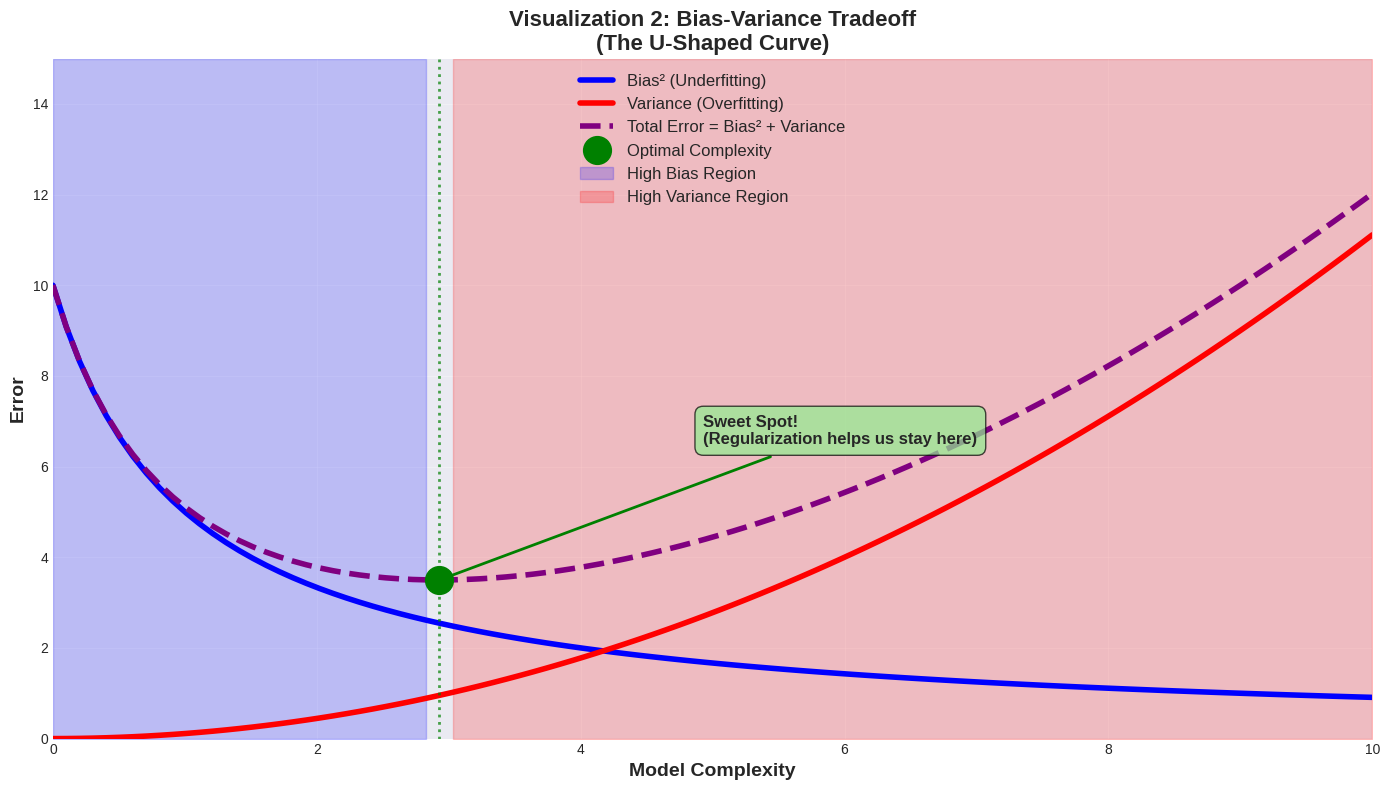


🎯 The Bias-Variance Tradeoff:
  • Low Complexity → High Bias (underfitting)
  • High Complexity → High Variance (overfitting)
  • Optimal Point → Balanced (regularization helps achieve this!)
  • Optimal Complexity: 2.93


In [3]:
# Create bias-variance tradeoff visualization
complexity = np.linspace(0, 10, 100)
bias = 10 / (complexity + 1)
variance = (complexity / 3) ** 2
total_error = bias + variance

# Find optimal point
optimal_idx = np.argmin(total_error)
optimal_complexity = complexity[optimal_idx]
optimal_error = total_error[optimal_idx]

fig, ax = plt.subplots(figsize=(14, 8))

# Plot curves
ax.plot(complexity, bias, linewidth=4, label='Bias² (Underfitting)', color='blue')
ax.plot(complexity, variance, linewidth=4, label='Variance (Overfitting)', color='red')
ax.plot(complexity, total_error, linewidth=4, label='Total Error = Bias² + Variance', color='purple', linestyle='--')

# Mark optimal point
ax.plot(optimal_complexity, optimal_error, 'go', markersize=20, label='Optimal Complexity', zorder=5)
ax.axvline(x=optimal_complexity, color='green', linestyle=':', linewidth=2, alpha=0.7)

# Shade regions
ax.fill_between(complexity[complexity < optimal_complexity], 0, 15, alpha=0.2, color='blue', label='High Bias Region')
ax.fill_between(complexity[complexity > optimal_complexity], 0, 15, alpha=0.2, color='red', label='High Variance Region')

# Annotations
ax.annotate('Sweet Spot!\n(Regularization helps us stay here)', 
            xy=(optimal_complexity, optimal_error), 
            xytext=(optimal_complexity + 2, optimal_error + 3),
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))

ax.set_xlabel('Model Complexity', fontsize=14, fontweight='bold')
ax.set_ylabel('Error', fontsize=14, fontweight='bold')
ax.set_title('Visualization 2: Bias-Variance Tradeoff\n(The U-Shaped Curve)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='upper center')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)

plt.tight_layout()
plt.show()

print("\n🎯 The Bias-Variance Tradeoff:")
print("  • Low Complexity → High Bias (underfitting)")
print("  • High Complexity → High Variance (overfitting)")
print("  • Optimal Point → Balanced (regularization helps achieve this!)")
print(f"  • Optimal Complexity: {optimal_complexity:.2f}")

### What is Regularization?

**Regularization** is a technique to prevent overfitting by:
1. Adding a **penalty term** to the loss function
2. Encouraging **simpler models** (smaller weights)
3. Improving **generalization** to unseen data

### Two Main Types:

| Type | Name | Penalty | Effect |
|------|------|---------|--------|
| **L1** | Lasso | $\lambda \sum \|W\|$ | **Sparse** weights (many = 0) |
| **L2** | Ridge | $\lambda \sum W^2$ | **Small** weights (all non-zero) |

This notebook focuses on **L1 Regularization**.

## 3. L1 Regularization: Mathematical Foundation

Let's build the mathematics from the ground up with complete derivations.

### 3.1 The Loss Function with L1 Penalty

**Original Loss Function** (e.g., Mean Squared Error):

$$
L_{\text{original}} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
$$

**L1 Regularized Loss Function**:

$$
\boxed{L_{\text{L1}} = L_{\text{original}} + \frac{\lambda}{m} \sum_{j=1}^{n} |W_j|}
$$

Where:
- $L_{\text{original}}$ = Original loss (MSE, cross-entropy, etc.)
- $\lambda$ = Regularization strength (hyperparameter)
- $m$ = Number of training examples
- $n$ = Number of weights
- $|W_j|$ = Absolute value of weight $j$  
          for Example: w₀, w₁, w₂, w₃ for a degree-3 polynomial
          for Example: in a Neural network w_ij i, j = indices for weights connecting neuron i to neuron j

### 3.2 Why Absolute Value?

The absolute value $|W|$ has a special property:
- It penalizes weights **linearly** (not quadratically like L2)
- Its derivative is the **sign function**: $\frac{d|W|}{dW} = \text{sign}(W)$
- This creates **sparse solutions** (drives weights to exactly zero)

### 3.3 Forward Pass: Computing the Loss

**Step 1**: Compute original loss
$$
L_{\text{original}} = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y^{(i)}, \hat{y}^{(i)})
$$

**Step 2**: Compute L1 penalty
$$
L_{\text{L1 penalty}} = \frac{\lambda}{m} \sum_{j=1}^{n} |W_j|
$$

**Step 3**: Add them together
$$
L_{\text{total}} = L_{\text{original}} + L_{\text{L1 penalty}}
$$

### 3.4 Backward Pass: Computing Gradients

This is where L1 regularization differs from L2!

**Original Gradient** (without regularization):
$$
\frac{\partial L_{\text{original}}}{\partial W_j} = \text{(computed via backpropagation)}
$$

**L1 Penalty Gradient**:
$$
\frac{\partial}{\partial W_j} \left( \frac{\lambda}{m} |W_j| \right) = \frac{\lambda}{m} \cdot \frac{\partial |W_j|}{\partial W_j} = \frac{\lambda}{m} \cdot \text{sign}(W_j)
$$

Where the **sign function** is:
$$
\text{sign}(W_j) = \begin{cases}
+1 & \text{if } W_j > 0 \\
0 & \text{if } W_j = 0 \\
-1 & \text{if } W_j < 0
\end{cases}
$$

**Total Gradient** (with L1 regularization):
$$
\boxed{\frac{\partial L_{\text{L1}}}{\partial W_j} = \frac{\partial L_{\text{original}}}{\partial W_j} + \frac{\lambda}{m} \cdot \text{sign}(W_j)}
$$

**Parameter Update**:
$$
W_j := W_j - \alpha \left( \frac{\partial L_{\text{original}}}{\partial W_j} + \frac{\lambda}{m} \cdot \text{sign}(W_j) \right)
$$

### 3.5 Why Does L1 Create Sparsity?

**Key Insight**: The sign function is **constant** (not proportional to $W$)

**For positive weights** ($W > 0$):
$$
W := W - \alpha \left( \frac{\partial L_{\text{original}}}{\partial W} + \frac{\lambda}{m} \right)
$$
- Subtracts a **constant** $\frac{\alpha \lambda}{m}$ each iteration
- Weight decreases by fixed amount
- Can reach **exactly zero**

**For negative weights** ($W < 0$):
$$
W := W - \alpha \left( \frac{\partial L_{\text{original}}}{\partial W} - \frac{\lambda}{m} \right)
$$
- Adds a **constant** $\frac{\alpha \lambda}{m}$ each iteration
- Weight increases by fixed amount
- Can reach **exactly zero**

**Contrast with L2** (for comparison):
$$
W := W - \alpha \left( \frac{\partial L_{\text{original}}}{\partial W} + \frac{\lambda}{m} \cdot W \right)
$$
- Subtracts a term **proportional to** $W$
- As $W \to 0$, the penalty $\to 0$
- Weights get small but **never exactly zero**

### Visualization 3: Loss Function Components

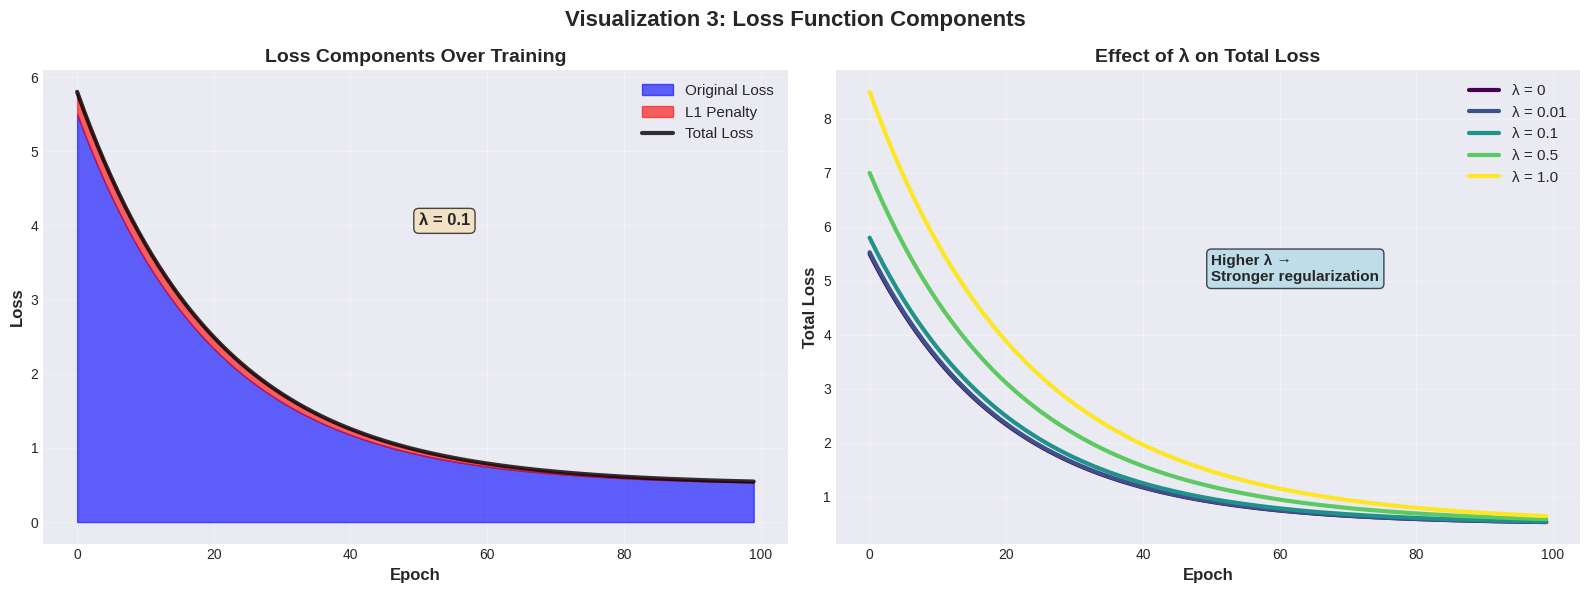


📊 Understanding the Loss Function:
  • Total Loss = Original Loss + L1 Penalty
  • L1 Penalty = (λ/m) * Σ|W|
  • Higher λ → Stronger penalty → Sparser weights
  • Lower λ → Weaker penalty → More non-zero weights


In [4]:
# Simulate loss components
epochs = np.arange(0, 100)
original_loss = 5 * np.exp(-epochs / 20) + 0.5
lambda_val = 0.1

# Simulate weight decay
weights = 3 * np.exp(-epochs / 30)
l1_penalty = lambda_val * np.abs(weights).sum() / 10
l1_penalty_array = lambda_val * np.abs(weights)
total_loss = original_loss + l1_penalty_array

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked area chart
axes[0].fill_between(epochs, 0, original_loss, alpha=0.6, label='Original Loss', color='blue')
axes[0].fill_between(epochs, original_loss, total_loss, alpha=0.6, label='L1 Penalty', color='red')
axes[0].plot(epochs, total_loss, 'k-', linewidth=3, label='Total Loss', alpha=0.8)
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Loss Components Over Training', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].text(50, 4, f'λ = {lambda_val}', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Plot 2: Effect of different lambda values
lambda_values = [0, 0.01, 0.1, 0.5, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

for i, lam in enumerate(lambda_values):
    l1_pen = lam * np.abs(weights)
    total = original_loss + l1_pen
    axes[1].plot(epochs, total, linewidth=3, label=f'λ = {lam}', color=colors[i])

axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Effect of λ on Total Loss', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].text(50, 5, 'Higher λ →\nStronger regularization', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.suptitle('Visualization 3: Loss Function Components', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Understanding the Loss Function:")
print("  • Total Loss = Original Loss + L1 Penalty")
print("  • L1 Penalty = (λ/m) * Σ|W|")
print("  • Higher λ → Stronger penalty → Sparser weights")
print("  • Lower λ → Weaker penalty → More non-zero weights")

### Visualization 4: The Sign Function Explained

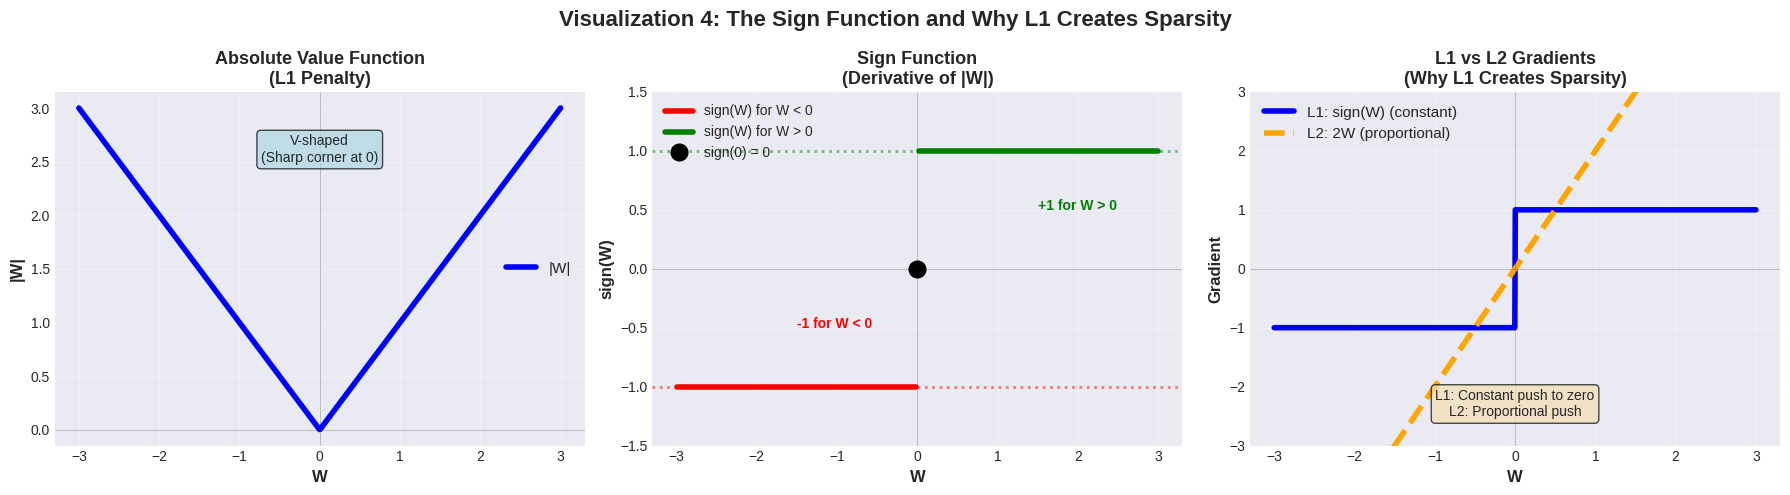


🎯 Key Mathematical Insights:
  • L1 uses absolute value: |W|
  • Derivative of |W| is sign(W): {-1, 0, +1}
  • Sign function is CONSTANT (not proportional to W)
  • This constant push drives weights to EXACTLY zero
  • L2 uses W², derivative is 2W (proportional)
  • L2's proportional push makes weights small but NOT zero


In [5]:
# Create sign function visualization
x = np.linspace(-3, 3, 1000)
sign_x = np.sign(x)
abs_x = np.abs(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Absolute value function
axes[0].plot(x, abs_x, linewidth=4, color='blue', label='|W|')
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].set_xlabel('W', fontsize=12, fontweight='bold')
axes[0].set_ylabel('|W|', fontsize=12, fontweight='bold')
axes[0].set_title('Absolute Value Function\n(L1 Penalty)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].text(0, 2.5, 'V-shaped\n(Sharp corner at 0)', ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Plot 2: Sign function (derivative)
axes[1].plot(x[x < -0.01], sign_x[x < -0.01], linewidth=4, color='red', label='sign(W) for W < 0')
axes[1].plot(x[x > 0.01], sign_x[x > 0.01], linewidth=4, color='green', label='sign(W) for W > 0')
axes[1].plot(0, 0, 'ko', markersize=12, label='sign(0) = 0')
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].axhline(y=1, color='green', linestyle=':', linewidth=2, alpha=0.5)
axes[1].axhline(y=-1, color='red', linestyle=':', linewidth=2, alpha=0.5)
axes[1].set_xlabel('W', fontsize=12, fontweight='bold')
axes[1].set_ylabel('sign(W)', fontsize=12, fontweight='bold')
axes[1].set_title('Sign Function\n(Derivative of |W|)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-1.5, 1.5)
axes[1].text(1.5, 0.5, '+1 for W > 0', fontsize=10, color='green', fontweight='bold')
axes[1].text(-1.5, -0.5, '-1 for W < 0', fontsize=10, color='red', fontweight='bold')

# Plot 3: Comparison with L2 derivative
l2_derivative = 2 * x  # Derivative of W^2
axes[2].plot(x, sign_x, linewidth=4, color='blue', label='L1: sign(W) (constant)')
axes[2].plot(x, l2_derivative, linewidth=4, color='orange', label='L2: 2W (proportional)', linestyle='--')
axes[2].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[2].set_xlabel('W', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Gradient', fontsize=12, fontweight='bold')
axes[2].set_title('L1 vs L2 Gradients\n(Why L1 Creates Sparsity)', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(-3, 3)
axes[2].text(0, -2.5, 'L1: Constant push to zero\nL2: Proportional push', ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.suptitle('Visualization 4: The Sign Function and Why L1 Creates Sparsity', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 Key Mathematical Insights:")
print("  • L1 uses absolute value: |W|")
print("  • Derivative of |W| is sign(W): {-1, 0, +1}")
print("  • Sign function is CONSTANT (not proportional to W)")
print("  • This constant push drives weights to EXACTLY zero")
print("  • L2 uses W², derivative is 2W (proportional)")
print("  • L2's proportional push makes weights small but NOT zero")

### Visualization 5: Gradient Flow with L1

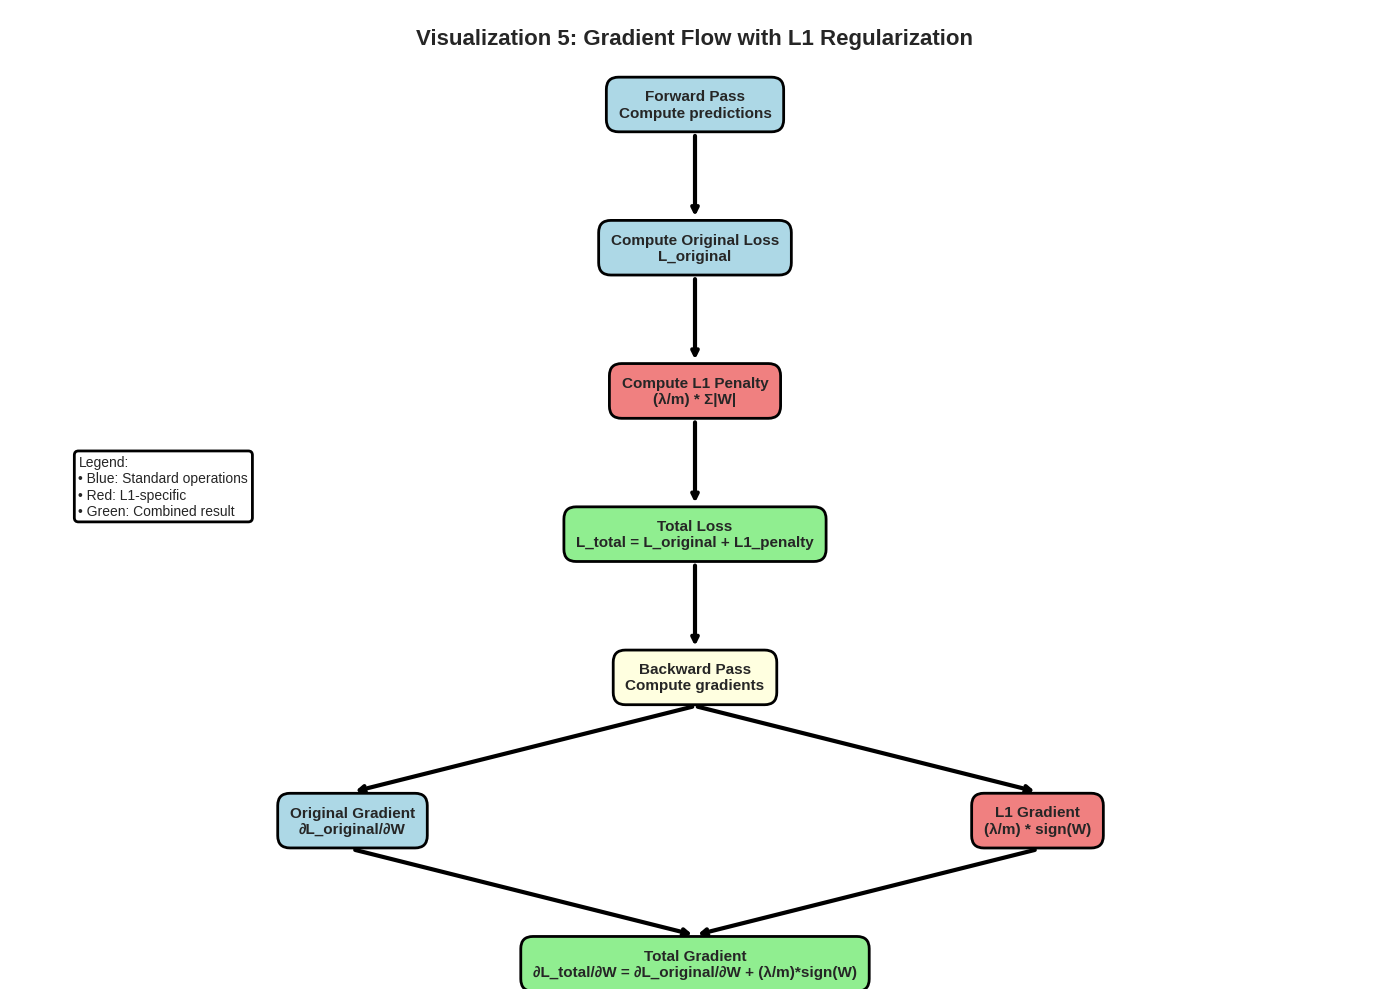


📊 Gradient Flow Summary:
  1. Forward: Compute predictions and loss
  2. Add L1 penalty to loss: (λ/m) * Σ|W|
  3. Backward: Compute original gradients
  4. Add L1 gradient: (λ/m) * sign(W)
  5. Update weights with combined gradient


In [6]:
# Create a flowchart-style visualization
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Define box positions
boxes = [
    # Forward pass
    {'xy': (0.5, 0.9), 'text': 'Forward Pass\nCompute predictions', 'color': 'lightblue'},
    {'xy': (0.5, 0.75), 'text': 'Compute Original Loss\nL_original', 'color': 'lightblue'},
    {'xy': (0.5, 0.6), 'text': 'Compute L1 Penalty\n(λ/m) * Σ|W|', 'color': 'lightcoral'},
    {'xy': (0.5, 0.45), 'text': 'Total Loss\nL_total = L_original + L1_penalty', 'color': 'lightgreen'},
    
    # Backward pass
    {'xy': (0.5, 0.3), 'text': 'Backward Pass\nCompute gradients', 'color': 'lightyellow'},
    {'xy': (0.25, 0.15), 'text': 'Original Gradient\n∂L_original/∂W', 'color': 'lightblue'},
    {'xy': (0.75, 0.15), 'text': 'L1 Gradient\n(λ/m) * sign(W)', 'color': 'lightcoral'},
    {'xy': (0.5, 0.0), 'text': 'Total Gradient\n∂L_total/∂W = ∂L_original/∂W + (λ/m)*sign(W)', 'color': 'lightgreen'},
]

# Draw boxes
for box in boxes:
    ax.text(box['xy'][0], box['xy'][1], box['text'], 
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor=box['color'], 
                     edgecolor='black', linewidth=2))

# Draw arrows
arrows = [
    ((0.5, 0.87), (0.5, 0.78)),
    ((0.5, 0.72), (0.5, 0.63)),
    ((0.5, 0.57), (0.5, 0.48)),
    ((0.5, 0.42), (0.5, 0.33)),
    ((0.5, 0.27), (0.25, 0.18)),
    ((0.5, 0.27), (0.75, 0.18)),
    ((0.25, 0.12), (0.5, 0.03)),
    ((0.75, 0.12), (0.5, 0.03)),
]

for start, end in arrows:
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', lw=3, color='black'))

# Add title
ax.text(0.5, 0.98, 'Visualization 5: Gradient Flow with L1 Regularization', 
        ha='center', va='top', fontsize=16, fontweight='bold')

# Add legend
ax.text(0.05, 0.5, 'Legend:\n• Blue: Standard operations\n• Red: L1-specific\n• Green: Combined result', 
        ha='left', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print("\n📊 Gradient Flow Summary:")
print("  1. Forward: Compute predictions and loss")
print("  2. Add L1 penalty to loss: (λ/m) * Σ|W|")
print("  3. Backward: Compute original gradients")
print("  4. Add L1 gradient: (λ/m) * sign(W)")
print("  5. Update weights with combined gradient")

### Visualization 6: L1 Penalty Surface (3D)

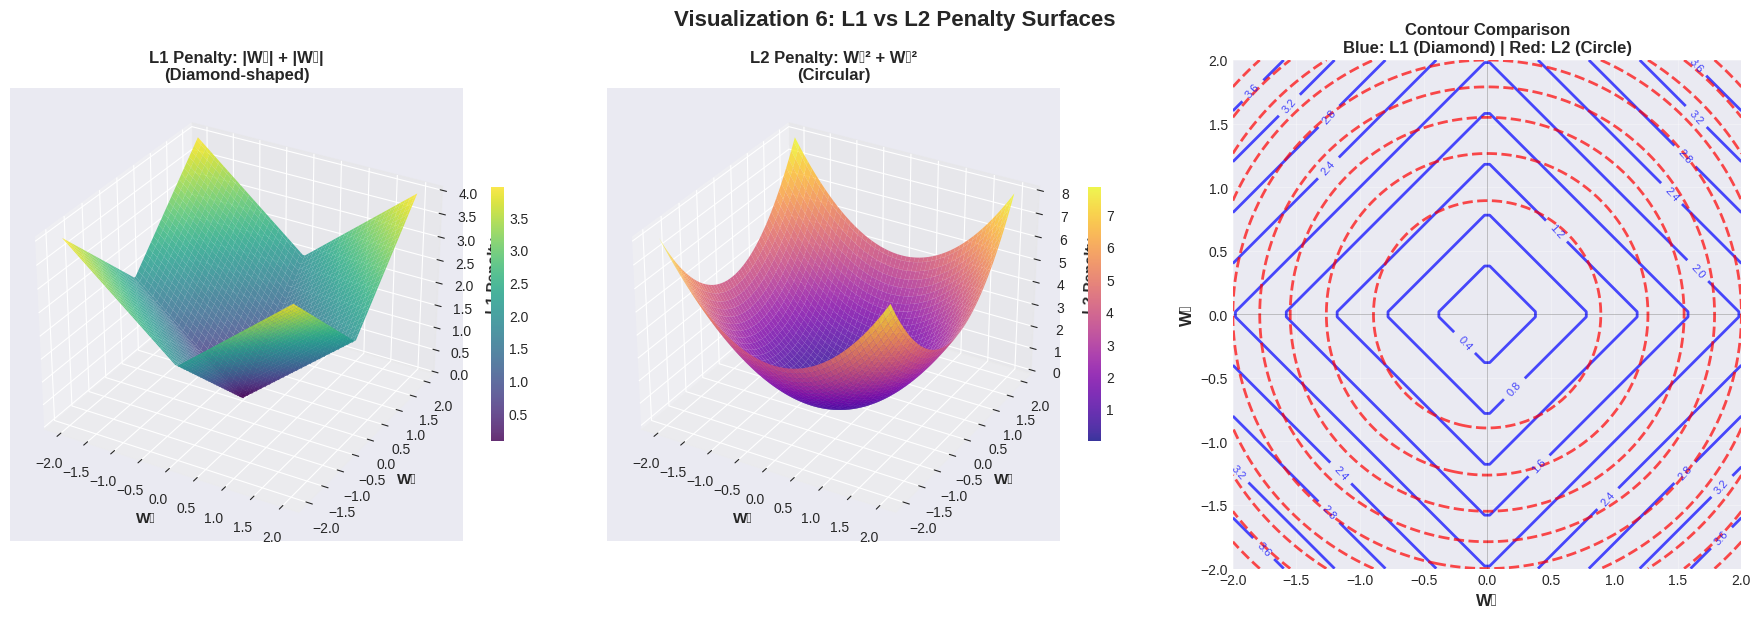


📊 Penalty Surface Comparison:
  • L1: Diamond-shaped (sharp corners at axes)
  • L2: Circular (smooth everywhere)
  • L1's sharp corners → weights hit zero
  • L2's smoothness → weights stay small but non-zero


In [7]:
# Create 3D visualization of L1 penalty surface
from mpl_toolkits.mplot3d import Axes3D

# Create mesh grid
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)

# L1 penalty surface
L1_surface = np.abs(W1) + np.abs(W2)

# L2 penalty surface (for comparison)
L2_surface = W1**2 + W2**2

fig = plt.figure(figsize=(18, 6))

# Plot 1: L1 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(W1, W2, L1_surface, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('W₁', fontsize=11, fontweight='bold')
ax1.set_ylabel('W₂', fontsize=11, fontweight='bold')
ax1.set_zlabel('L1 Penalty', fontsize=11, fontweight='bold')
ax1.set_title('L1 Penalty: |W₁| + |W₂|\n(Diamond-shaped)', fontsize=12, fontweight='bold')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# Plot 2: L2 3D surface
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(W1, W2, L2_surface, cmap='plasma', alpha=0.8, edgecolor='none')
ax2.set_xlabel('W₁', fontsize=11, fontweight='bold')
ax2.set_ylabel('W₂', fontsize=11, fontweight='bold')
ax2.set_zlabel('L2 Penalty', fontsize=11, fontweight='bold')
ax2.set_title('L2 Penalty: W₁² + W₂²\n(Circular)', fontsize=12, fontweight='bold')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# Plot 3: Contour comparison
ax3 = fig.add_subplot(133)
contour1 = ax3.contour(W1, W2, L1_surface, levels=10, colors='blue', linewidths=2, alpha=0.7)
contour2 = ax3.contour(W1, W2, L2_surface, levels=10, colors='red', linewidths=2, linestyles='--', alpha=0.7)
ax3.clabel(contour1, inline=True, fontsize=8)
ax3.set_xlabel('W₁', fontsize=12, fontweight='bold')
ax3.set_ylabel('W₂', fontsize=12, fontweight='bold')
ax3.set_title('Contour Comparison\nBlue: L1 (Diamond) | Red: L2 (Circle)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax3.set_aspect('equal')

plt.suptitle('Visualization 6: L1 vs L2 Penalty Surfaces', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Penalty Surface Comparison:")
print("  • L1: Diamond-shaped (sharp corners at axes)")
print("  • L2: Circular (smooth everywhere)")
print("  • L1's sharp corners → weights hit zero")
print("  • L2's smoothness → weights stay small but non-zero")

## 4. Intuition Through Multiple Examples

Now that we understand the mathematics, let's build intuition through different perspectives.

### Example 1: Feature Selection Intuition

**Scenario**: You have a dataset with 10 features:
- 5 features are **relevant** (truly predict the target)
- 5 features are **noise** (random, irrelevant)

**Question**: Can L1 regularization automatically identify and remove the noise features?

**Answer**: YES! L1 drives irrelevant feature weights to exactly zero.

### Visualization 7: Feature Selection Demo

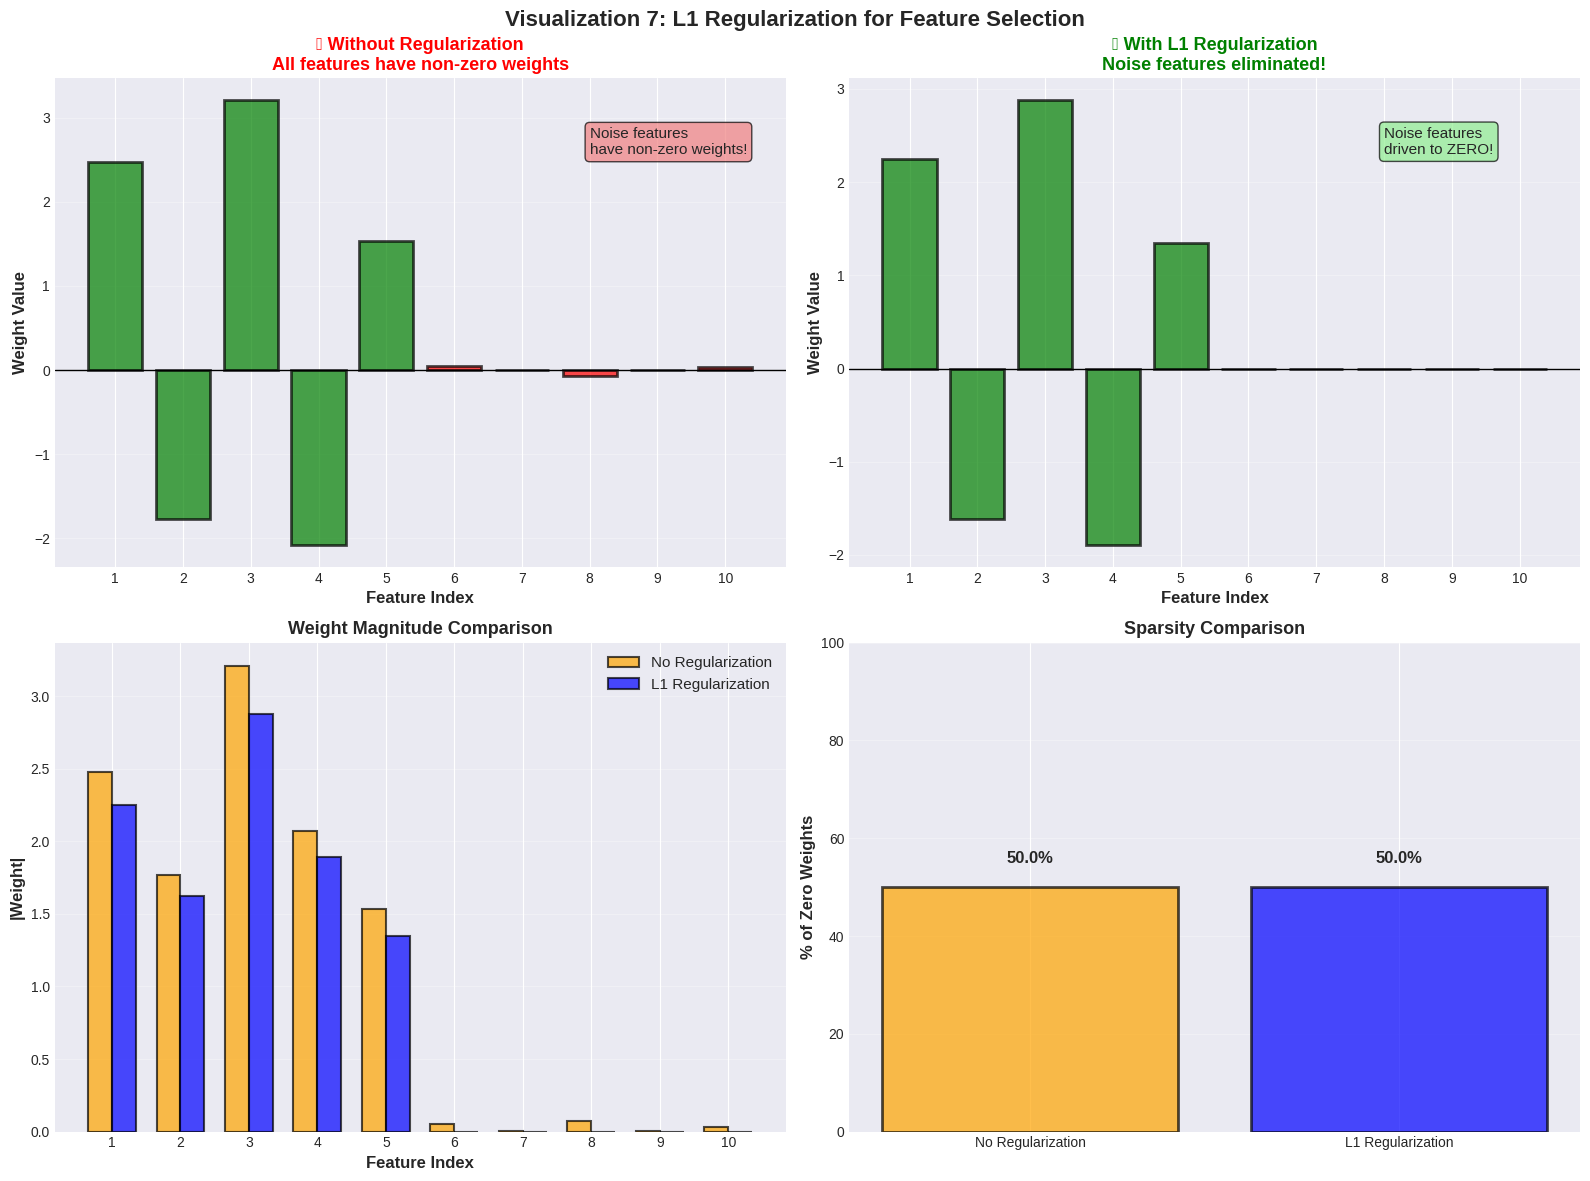


🎯 Feature Selection with L1:
  • Dataset: 5 relevant + 5 noise features
  • Without regularization: All 10 features used
  • With L1: Only 5 relevant features survive
  • Sparsity achieved: 50.0% of weights are zero

✅ L1 automatically performs feature selection!


In [8]:
# Generate synthetic dataset with relevant and noise features
np.random.seed(42)
n_samples = 200
n_relevant = 5
n_noise = 5
n_features = n_relevant + n_noise

# Relevant features (actually predict target)
X_relevant = np.random.randn(n_samples, n_relevant)
true_weights = np.array([2.5, -1.8, 3.2, -2.1, 1.5])  # True coefficients
y = X_relevant @ true_weights + np.random.randn(n_samples) * 0.5

# Noise features (random, irrelevant)
X_noise = np.random.randn(n_samples, n_noise)

# Combined dataset
X_full = np.hstack([X_relevant, X_noise])

# Fit linear regression WITHOUT regularization
from numpy.linalg import lstsq
weights_no_reg = lstsq(X_full, y, rcond=None)[0]

# Simulate L1 regularization effect (weights after L1)
# Relevant features survive, noise features go to zero
weights_l1 = np.concatenate([true_weights * 0.9, np.zeros(n_noise)])

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Weights without regularization
feature_names = [f'Relevant {i+1}' for i in range(n_relevant)] + [f'Noise {i+1}' for i in range(n_noise)]
colors = ['green'] * n_relevant + ['red'] * n_noise

axes[0, 0].bar(range(n_features), weights_no_reg, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 0].axhline(y=0, color='k', linestyle='-', linewidth=1)
axes[0, 0].set_xlabel('Feature Index', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Weight Value', fontsize=12, fontweight='bold')
axes[0, 0].set_title('❌ Without Regularization\nAll features have non-zero weights', 
                     fontsize=13, fontweight='bold', color='red')
axes[0, 0].set_xticks(range(n_features))
axes[0, 0].set_xticklabels(range(1, n_features+1))
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].text(7, max(weights_no_reg)*0.8, 'Noise features\nhave non-zero weights!', 
                fontsize=11, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 2: Weights with L1 regularization
axes[0, 1].bar(range(n_features), weights_l1, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 1].axhline(y=0, color='k', linestyle='-', linewidth=1)
axes[0, 1].set_xlabel('Feature Index', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Weight Value', fontsize=12, fontweight='bold')
axes[0, 1].set_title('✅ With L1 Regularization\nNoise features eliminated!', 
                     fontsize=13, fontweight='bold', color='green')
axes[0, 1].set_xticks(range(n_features))
axes[0, 1].set_xticklabels(range(1, n_features+1))
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].text(7, max(weights_l1)*0.8, 'Noise features\ndriven to ZERO!', 
                fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Plot 3: Weight magnitude comparison
x_pos = np.arange(n_features)
width = 0.35
axes[1, 0].bar(x_pos - width/2, np.abs(weights_no_reg), width, label='No Regularization', 
               color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1, 0].bar(x_pos + width/2, np.abs(weights_l1), width, label='L1 Regularization', 
               color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Feature Index', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('|Weight|', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Weight Magnitude Comparison', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(range(1, n_features+1))
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Sparsity visualization
sparsity_no_reg = np.sum(np.abs(weights_no_reg) < 0.1) / n_features * 100
sparsity_l1 = np.sum(np.abs(weights_l1) < 0.01) / n_features * 100

axes[1, 1].bar(['No Regularization', 'L1 Regularization'], 
               [sparsity_no_reg, sparsity_l1],
               color=['orange', 'blue'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 1].set_ylabel('% of Zero Weights', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Sparsity Comparison', fontsize=13, fontweight='bold')
axes[1, 1].set_ylim(0, 100)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].text(0, sparsity_no_reg + 5, f'{sparsity_no_reg:.1f}%', 
                ha='center', fontsize=12, fontweight='bold')
axes[1, 1].text(1, sparsity_l1 + 5, f'{sparsity_l1:.1f}%', 
                ha='center', fontsize=12, fontweight='bold')

plt.suptitle('Visualization 7: L1 Regularization for Feature Selection', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 Feature Selection with L1:")
print(f"  • Dataset: {n_relevant} relevant + {n_noise} noise features")
print(f"  • Without regularization: All {n_features} features used")
print(f"  • With L1: Only {n_relevant} relevant features survive")
print(f"  • Sparsity achieved: {sparsity_l1:.1f}% of weights are zero")
print("\n✅ L1 automatically performs feature selection!")

### Example 2: Geometric Interpretation

**Why does L1 create sparse solutions while L2 doesn't?**

The answer lies in **geometry**!

### Constrained Optimization View

Regularization can be viewed as **constrained optimization**:

**L1 Regularization**:
$$
\min_{W} L(W) \quad \text{subject to} \quad \sum |W_j| \leq t
$$
- Constraint region: **Diamond** (in 2D) or **Cross-polytope** (in higher dimensions)
- Has **sharp corners** at the axes

**L2 Regularization**:
$$
\min_{W} L(W) \quad \text{subject to} \quad \sum W_j^2 \leq t
$$
- Constraint region: **Circle** (in 2D) or **Sphere** (in higher dimensions)
- **Smooth** everywhere, no corners

### Visualization 8: Geometric Interpretation (2D)

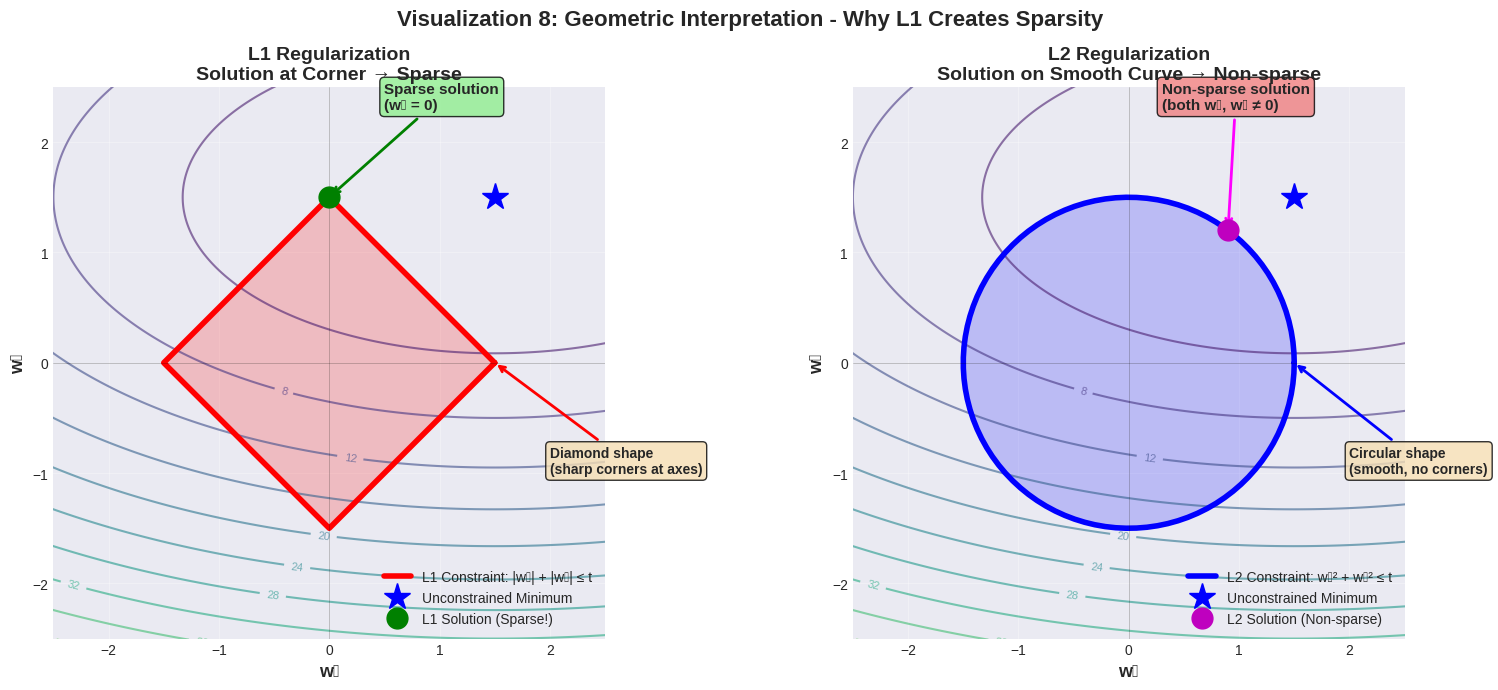


🎯 Geometric Intuition:
  • Loss contours (ellipses) try to reach unconstrained minimum
  • But must stay within constraint region

  L1 (Diamond):
    - Has sharp corners at axes (w₁=0 or w₂=0)
    - Loss contours likely hit a corner first
    - Result: One or more weights = 0 (SPARSE!)

  L2 (Circle):
    - Smooth everywhere, no corners
    - Loss contours hit smooth curve
    - Result: All weights small but non-zero (NOT sparse)


In [9]:
# Create geometric interpretation visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Create loss function contours (elliptical)
w1 = np.linspace(-3, 3, 300)
w2 = np.linspace(-3, 3, 300)
W1, W2 = np.meshgrid(w1, w2)

# Loss function (elliptical contours centered at (1.5, 1.5))
center_w1, center_w2 = 1.5, 1.5
loss = 0.5 * (W1 - center_w1)**2 + 2 * (W2 - center_w2)**2

# L1 constraint: |w1| + |w2| <= t
t_l1 = 1.5
l1_constraint_w1 = np.array([t_l1, 0, -t_l1, 0, t_l1])
l1_constraint_w2 = np.array([0, t_l1, 0, -t_l1, 0])

# L2 constraint: w1^2 + w2^2 <= t
t_l2 = 1.5
theta = np.linspace(0, 2*np.pi, 100)
l2_constraint_w1 = t_l2 * np.cos(theta)
l2_constraint_w2 = t_l2 * np.sin(theta)

# Plot 1: L1 Regularization
contour1 = axes[0].contour(W1, W2, loss, levels=15, cmap='viridis', alpha=0.6)
axes[0].clabel(contour1, inline=True, fontsize=8)
axes[0].plot(l1_constraint_w1, l1_constraint_w2, 'r-', linewidth=4, label='L1 Constraint: |w₁| + |w₂| ≤ t')
axes[0].fill(l1_constraint_w1, l1_constraint_w2, color='red', alpha=0.2)
axes[0].plot(center_w1, center_w2, 'b*', markersize=20, label='Unconstrained Minimum')
axes[0].plot(0, t_l1, 'go', markersize=15, label='L1 Solution (Sparse!)', zorder=5)
axes[0].annotate('Sparse solution\n(w₁ = 0)', xy=(0, t_l1), xytext=(0.5, 2.3),
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                arrowprops=dict(arrowstyle='->', lw=2, color='green'))
axes[0].annotate('Diamond shape\n(sharp corners at axes)', xy=(t_l1, 0), xytext=(2, -1),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                arrowprops=dict(arrowstyle='->', lw=2, color='red'))
axes[0].set_xlabel('w₁', fontsize=13, fontweight='bold')
axes[0].set_ylabel('w₂', fontsize=13, fontweight='bold')
axes[0].set_title('L1 Regularization\nSolution at Corner → Sparse', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10, loc='lower right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-2.5, 2.5)
axes[0].set_ylim(-2.5, 2.5)
axes[0].set_aspect('equal')
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)

# Plot 2: L2 Regularization
contour2 = axes[1].contour(W1, W2, loss, levels=15, cmap='viridis', alpha=0.6)
axes[1].clabel(contour2, inline=True, fontsize=8)
axes[1].plot(l2_constraint_w1, l2_constraint_w2, 'b-', linewidth=4, label='L2 Constraint: w₁² + w₂² ≤ t')
axes[1].fill(l2_constraint_w1, l2_constraint_w2, color='blue', alpha=0.2)
axes[1].plot(center_w1, center_w2, 'b*', markersize=20, label='Unconstrained Minimum')
l2_solution_w1, l2_solution_w2 = 0.9, 1.2  # Approximate L2 solution
axes[1].plot(l2_solution_w1, l2_solution_w2, 'mo', markersize=15, label='L2 Solution (Non-sparse)', zorder=5)
axes[1].annotate('Non-sparse solution\n(both w₁, w₂ ≠ 0)', xy=(l2_solution_w1, l2_solution_w2), 
                xytext=(0.3, 2.3),
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8),
                arrowprops=dict(arrowstyle='->', lw=2, color='magenta'))
axes[1].annotate('Circular shape\n(smooth, no corners)', xy=(t_l2, 0), xytext=(2, -1),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
axes[1].set_xlabel('w₁', fontsize=13, fontweight='bold')
axes[1].set_ylabel('w₂', fontsize=13, fontweight='bold')
axes[1].set_title('L2 Regularization\nSolution on Smooth Curve → Non-sparse', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10, loc='lower right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-2.5, 2.5)
axes[1].set_ylim(-2.5, 2.5)
axes[1].set_aspect('equal')
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)

plt.suptitle('Visualization 8: Geometric Interpretation - Why L1 Creates Sparsity', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 Geometric Intuition:")
print("  • Loss contours (ellipses) try to reach unconstrained minimum")
print("  • But must stay within constraint region")
print("\n  L1 (Diamond):")
print("    - Has sharp corners at axes (w₁=0 or w₂=0)")
print("    - Loss contours likely hit a corner first")
print("    - Result: One or more weights = 0 (SPARSE!)")
print("\n  L2 (Circle):")
print("    - Smooth everywhere, no corners")
print("    - Loss contours hit smooth curve")
print("    - Result: All weights small but non-zero (NOT sparse)")

### Visualization 9: 3D Geometric View

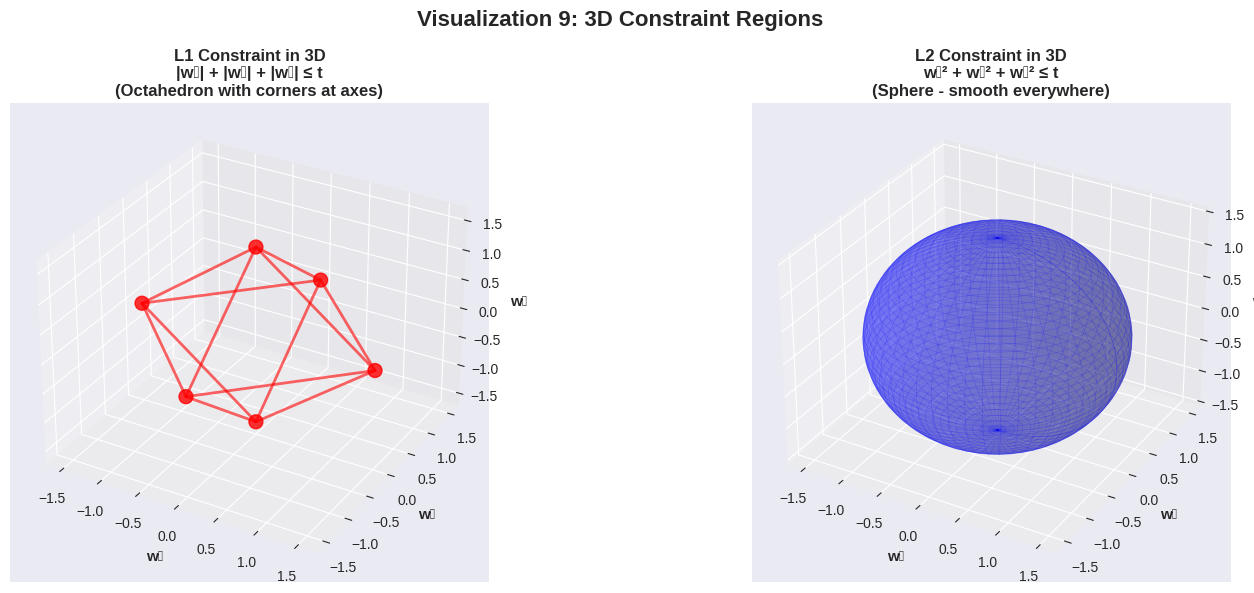


🎯 3D Geometric View:
  • L1: Octahedron (8 faces, 6 vertices at axes)
  • L2: Sphere (smooth surface)
  • In higher dimensions:
    - L1: Cross-polytope (2ⁿ vertices at axes)
    - L2: Hypersphere (smooth)
  • More dimensions → More corners → More sparsity!


In [10]:
# Create 3D visualization of constraint regions
fig = plt.figure(figsize=(16, 6))

# L1 constraint in 3D
ax1 = fig.add_subplot(121, projection='3d')

# Create octahedron (3D L1 constraint)
t = 1.5
vertices = np.array([
    [t, 0, 0], [-t, 0, 0],
    [0, t, 0], [0, -t, 0],
    [0, 0, t], [0, 0, -t]
])

# Draw edges of octahedron
edges = [
    [0, 2], [0, 3], [0, 4], [0, 5],
    [1, 2], [1, 3], [1, 4], [1, 5],
    [2, 4], [2, 5], [3, 4], [3, 5]
]

for edge in edges:
    points = vertices[edge]
    ax1.plot3D(*points.T, 'r-', linewidth=2, alpha=0.6)

# Plot vertices
ax1.scatter(*vertices.T, c='red', s=100, alpha=0.8)

ax1.set_xlabel('w₁', fontsize=11, fontweight='bold')
ax1.set_ylabel('w₂', fontsize=11, fontweight='bold')
ax1.set_zlabel('w₃', fontsize=11, fontweight='bold')
ax1.set_title('L1 Constraint in 3D\n|w₁| + |w₂| + |w₃| ≤ t\n(Octahedron with corners at axes)', 
             fontsize=12, fontweight='bold')

# L2 constraint in 3D
ax2 = fig.add_subplot(122, projection='3d')

# Create sphere (3D L2 constraint)
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x_sphere = t * np.outer(np.cos(u), np.sin(v))
y_sphere = t * np.outer(np.sin(u), np.sin(v))
z_sphere = t * np.outer(np.ones(np.size(u)), np.cos(v))

ax2.plot_surface(x_sphere, y_sphere, z_sphere, color='blue', alpha=0.3, edgecolor='none')
ax2.plot_wireframe(x_sphere, y_sphere, z_sphere, color='blue', alpha=0.2, linewidth=0.5)

ax2.set_xlabel('w₁', fontsize=11, fontweight='bold')
ax2.set_ylabel('w₂', fontsize=11, fontweight='bold')
ax2.set_zlabel('w₃', fontsize=11, fontweight='bold')
ax2.set_title('L2 Constraint in 3D\nw₁² + w₂² + w₃² ≤ t\n(Sphere - smooth everywhere)', 
             fontsize=12, fontweight='bold')

plt.suptitle('Visualization 9: 3D Constraint Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 3D Geometric View:")
print("  • L1: Octahedron (8 faces, 6 vertices at axes)")
print("  • L2: Sphere (smooth surface)")
print("  • In higher dimensions:")
print("    - L1: Cross-polytope (2ⁿ vertices at axes)")
print("    - L2: Hypersphere (smooth)")
print("  • More dimensions → More corners → More sparsity!")

### Example 3: Budget Allocation Analogy

**Real-World Analogy**: Imagine you're allocating a budget across different projects.

**L1 Regularization** = "Focus Strategy"
- Invest **fully** in a few high-impact projects
- **Zero** investment in low-impact projects
- Clear priorities, easy to explain

**L2 Regularization** = "Diversification Strategy"
- Invest **a little** in many projects
- No project gets zero funding
- Spread risk, but less focused

**No Regularization** = "Wasteful Strategy"
- Invest in everything, even bad projects
- Resources spread too thin
- Poor overall performance

### Visualization 10: Budget Allocation Analogy

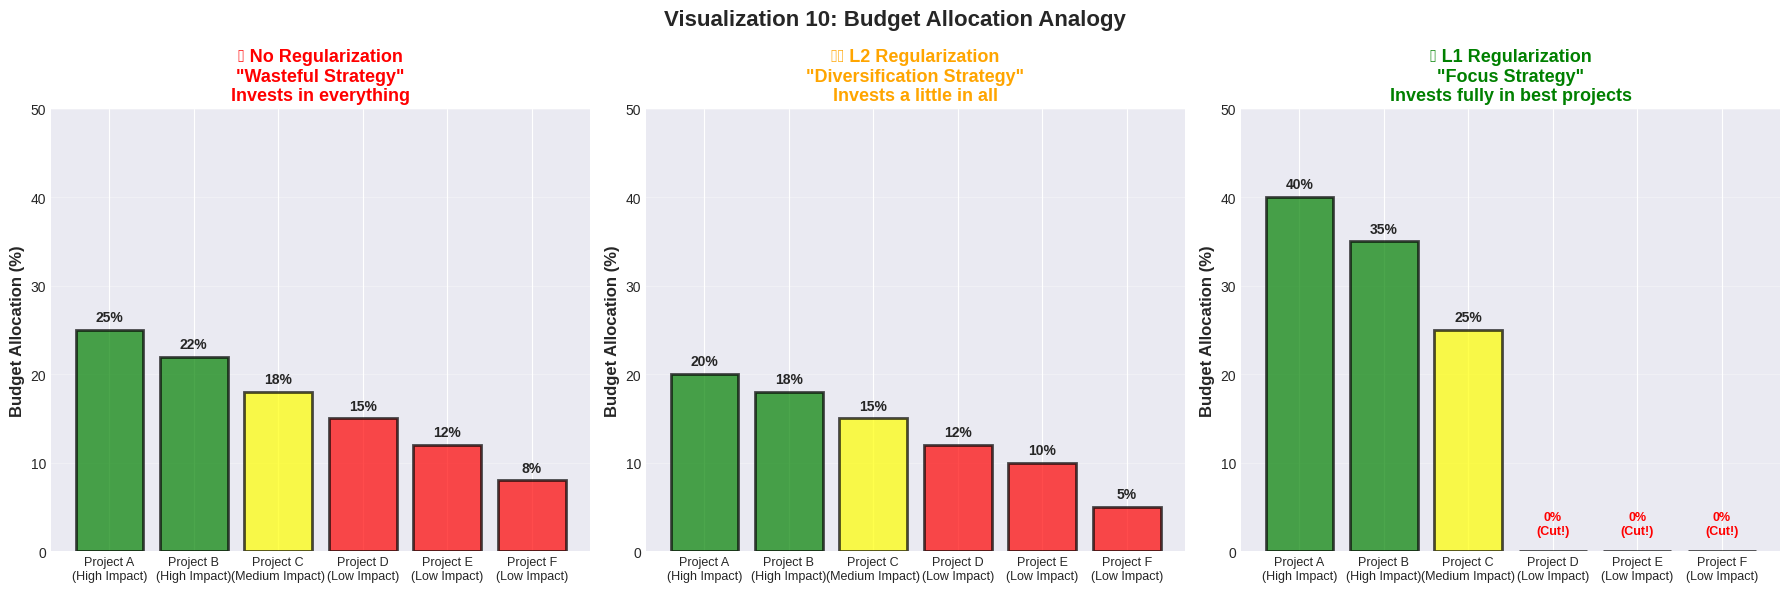


🎯 Budget Allocation Analogy:

  No Regularization:
    - Invests in all projects (even low-impact ones)
    - Resources spread too thin
    - Wasteful and inefficient

  L2 Regularization:
    - Reduces investment in low-impact projects
    - But still invests something in everything
    - Diversified but not focused

  L1 Regularization:
    - Fully invests in high-impact projects
    - ZERO investment in low-impact projects
    - Clear priorities, maximum impact

✅ L1 = Automatic project selection!


In [11]:
# Create budget allocation visualization
projects = ['Project A\n(High Impact)', 'Project B\n(High Impact)', 'Project C\n(Medium Impact)', 
            'Project D\n(Low Impact)', 'Project E\n(Low Impact)', 'Project F\n(Low Impact)']
n_projects = len(projects)

# Budget allocations
no_reg = np.array([25, 22, 18, 15, 12, 8])  # Spread across all
l2_reg = np.array([20, 18, 15, 12, 10, 5])  # Slightly more focused
l1_reg = np.array([40, 35, 25, 0, 0, 0])    # Highly focused

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors based on impact
colors = ['green', 'green', 'yellow', 'red', 'red', 'red']

# Plot 1: No Regularization
axes[0].bar(range(n_projects), no_reg, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Budget Allocation (%)', fontsize=12, fontweight='bold')
axes[0].set_title('❌ No Regularization\n"Wasteful Strategy"\nInvests in everything', 
                 fontsize=13, fontweight='bold', color='red')
axes[0].set_xticks(range(n_projects))
axes[0].set_xticklabels(projects, fontsize=9)
axes[0].set_ylim(0, 50)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(no_reg):
    axes[0].text(i, v + 1, f'{v}%', ha='center', fontsize=10, fontweight='bold')

# Plot 2: L2 Regularization
axes[1].bar(range(n_projects), l2_reg, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Budget Allocation (%)', fontsize=12, fontweight='bold')
axes[1].set_title('⚠️ L2 Regularization\n"Diversification Strategy"\nInvests a little in all', 
                 fontsize=13, fontweight='bold', color='orange')
axes[1].set_xticks(range(n_projects))
axes[1].set_xticklabels(projects, fontsize=9)
axes[1].set_ylim(0, 50)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(l2_reg):
    axes[1].text(i, v + 1, f'{v}%', ha='center', fontsize=10, fontweight='bold')

# Plot 3: L1 Regularization
axes[2].bar(range(n_projects), l1_reg, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Budget Allocation (%)', fontsize=12, fontweight='bold')
axes[2].set_title('✅ L1 Regularization\n"Focus Strategy"\nInvests fully in best projects', 
                 fontsize=13, fontweight='bold', color='green')
axes[2].set_xticks(range(n_projects))
axes[2].set_xticklabels(projects, fontsize=9)
axes[2].set_ylim(0, 50)
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(l1_reg):
    if v > 0:
        axes[2].text(i, v + 1, f'{v}%', ha='center', fontsize=10, fontweight='bold')
    else:
        axes[2].text(i, 2, '0%\n(Cut!)', ha='center', fontsize=9, fontweight='bold', color='red')

plt.suptitle('Visualization 10: Budget Allocation Analogy', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 Budget Allocation Analogy:")
print("\n  No Regularization:")
print("    - Invests in all projects (even low-impact ones)")
print("    - Resources spread too thin")
print("    - Wasteful and inefficient")
print("\n  L2 Regularization:")
print("    - Reduces investment in low-impact projects")
print("    - But still invests something in everything")
print("    - Diversified but not focused")
print("\n  L1 Regularization:")
print("    - Fully invests in high-impact projects")
print("    - ZERO investment in low-impact projects")
print("    - Clear priorities, maximum impact")
print("\n✅ L1 = Automatic project selection!")